**Цель работы:**

Изучение алгоритмов и методов регрессии на практике

Вариант №4

#### Импорт основных библиотек и загрузка данных

In [11]:
# Импорт основных библиотек для анализа данных и визуализации и чтение файла
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df_var4 = pd.read_excel('regression.xlsx', sheet_name=3)


## Часть 1 - Простая линейная регрессия

Обучить модель простой (парной) линейной регрессии, используя для обучения
значения x1 и y, а затем x2 и y

1.1 Для обучения модели были выполнены следующие шаги:

- Данные были разделены на обучающую и тестовую выборки. Для обеих моделей применяется одинаковое разбиение: 70% данных для обучения и 30% для тестирования с random_state равным 42 для того, чтобы можно было воспроизвести результаты.
- Был создан экземпляр LinearRegression и он был обучен на данных x_train и y_train с помощью метода .fit().

In [12]:
# Подготовка данных для первой модели
X1_train, X1_test, y1_train, y1_test = train_test_split(
    df_var4[['x1']], df_var4['y'], test_size=0.3, random_state=42
)

# Подготовка данных для второй модели
X2_train, X2_test, y2_train, y2_test = train_test_split(
    df_var4[['x2']], df_var4['y'], test_size=0.3, random_state=42
)

# Создание и обучение первой модели 
model_x1 = LinearRegression()
model_x1.fit(X1_train, y1_train)

# Создание и обучение второй модели
model_x2 = LinearRegression()
model_x2.fit(X2_train, y2_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


1.2 Далее была использована обученная модель, чтобы предсказать значения y методом predict()

In [13]:
# Выполнение предсказания для обеих моделей
y_pred_x1 = model_x1.predict(df_var4[['x1']])
y_pred_x2 = model_x2.predict(df_var4[['x2']])

1.3 Был создан новый DataFrame с истинными значениями и результатами предсказанных значений

In [14]:
# Создание DataFrame с результатми предсказаний
df_results = pd.DataFrame({
    'Actual': df_var4['y'],
    'Predicted_x1': y_pred_x1,
    'Predicted_x2': y_pred_x2})

display(df_results.head())
display(df_results.tail())

,Actual,Predicted_x1,Predicted_x2
0,-0.791517,-0.536668,-0.771817
1,-0.753785,-0.538386,-0.731886
2,-0.296641,-0.534007,-0.153361
3,-0.120361,-0.509045,-0.121210
4,-1.278531,-0.514134,-0.743007


,Actual,Predicted_x1,Predicted_x2
995,-0.046646,-0.502031,-0.339754
996,0.008188,-0.480163,-0.527624
997,-0.209619,-0.530028,-0.549184
998,-0.149366,-0.512195,-0.699676
999,-0.205868,-0.513316,-0.744272


1.4 Были подсчитаны и выведены в консоль метрики качества регрессии (MSE, MAE, RMSE, R2) для каждой модели, для этого была создана функция, чтобы не дублировать код

In [15]:
def get_regression_metrics(y_true, y_pred, model_name):
    """Выводит 4 основные метрики регрессии"""
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(model_name)
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2: {r2:.4f}")

# Предсказания на тренировочных и тестовых данных для обеих моделей
y1_pred_train = model_x1.predict(X1_train)
y1_pred_test = model_x1.predict(X1_test)

y2_pred_train = model_x2.predict(X2_train)
y2_pred_test = model_x2.predict(X2_test)

# Вывод метрик для тренировочных данных
print('Тренировочные данные: ')
get_regression_metrics(y1_train, y1_pred_train, "Первая модель")
get_regression_metrics(y2_train, y2_pred_train, "Вторая модель")

# Вывод метрик для тестовых данных
print('Тестовые данные: ')
get_regression_metrics(y1_test, y1_pred_test, "Первая модель")
get_regression_metrics(y2_test, y2_pred_test, "Вторая модель")

Тренировочные данные: 
Первая модель
MSE: 0.3130
MAE: 0.4438
RMSE: 0.5595
R2: 0.0032
Вторая модель
MSE: 0.2299
MAE: 0.3842
RMSE: 0.4795
R2: 0.2678
Тестовые данные: 
Первая модель
MSE: 0.2922
MAE: 0.4296
RMSE: 0.5405
R2: -0.0288
Вторая модель
MSE: 0.2167
MAE: 0.3683
RMSE: 0.4655
R2: 0.2370


#### Пояснения и выводы по полученным метрикам:
##### Метрики ошибок (MSE, MAE, RMSE)
Эти метрики показывают, насколько модель ошибается. Чем они ниже, тем лучше
- MSE: у модели 1 - 0.3130 (тренировочная) и 0.2922 (тестовая), у модели 2 - 0.2299 (тренировочная) и 0.2167 (тестовая). Эта метрика выявляет среднее значение квадратов ошибок. У модели 2 этот показатель значительно ниже и в тренировочной и в тестовой выборках, что говорит о том, что у нее меньше грубых промахов
- MAE: у модели 1 - 0.4438 (тренировочная) и 0.4296 (тестовая), у модели 2 - 0.3842 (тренировочная) и 0.3683 (тестовая). В среднем, предсказание модели 1 отклоняется от истинного значения на 0.05 больше, чем модель 2.
- RMSE: у модели 1 - 0.5595 (тренировочная) и 0.5405 (тестовая), у модели 2 - 0.4795 (тренировочная) и 0.4655 (тестовая). Это квадратный корень из MSE.
##### Метрика качества R2 - коэффициент детерминации
Эта метрика определяет долю изменений (от 0 до 1), обусловленных влиянием признаков на целевую переменную. Чем ближе к 1, тем лучше
- R2 модели 1: 0.0032 (тренировочная) и -0.0288 (тестовая). Это значение очень близко к нулю, а у тестовой выборки вообще ниже нуля, это значит, что модель работает хуже, чем самая простая модель, которая всегда предсказывает среднее значение целевой переменной. Фактически, это означает, что между x_1 и y нет линейной связи.
- R2 модели 2: 0.2678 (тренировочная) и 0.2370 (тестовая). Этот результат намного лучше. Модель 2 объясняет около 25% всей изменчивости y. Это тоже не очень высокий результат, который указывает на наличие очень слабой или умеренной линейной связи между x_2 и y.

1.5 Вывод значений коэффициентов a и b

In [16]:
# Модель 1
a1 = model_x1.coef_[0]
b1 = model_x1.intercept_
print(f"Модель 1: коэффициент a {a1:.4f} коэффициент b {b1:.4f}")

# Модель 2
a2 = model_x2.coef_[0]
b2 = model_x2.intercept_
print(f"Модель 2: коэффициент a {a2:.4f} коэффициент b {b2:.4f}")

Модель 1: коэффициент a -0.0882 коэффициент b -0.5201
Модель 2: коэффициент a -0.8563 коэффициент b -0.0199


1.6 Визуализация регрессии: точки и линия регрессии

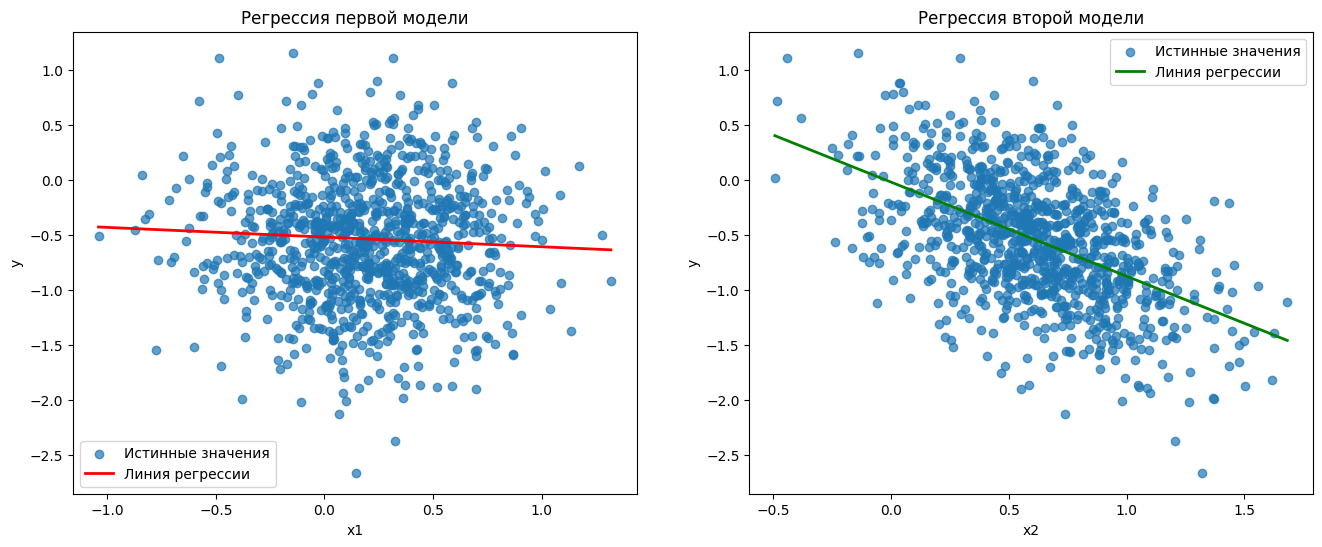

In [18]:
# Получение коэффициентов регрессии для x1
a1 = model_x1.coef_[0]
b1 = model_x1.intercept_

# Получение коэффициентов регрессии для x2
a2 = model_x2.coef_[0]
b2 = model_x2.intercept_

# Линия регрессии x1
x_min_1 = df_var4['x1'].min()
x_max_1 = df_var4['x1'].max()

# Линия регрессии x2
x_min_2 = df_var4['x2'].min()
x_max_2 = df_var4['x2'].max()

# Создание фигуры с двумя областями для графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# График для первой модели
ax1.scatter(df_var4['x1'], df_var4['y'], label='Истинные значения', alpha=0.7)
ax1.plot([x_min_1, x_max_1], [a1*x_min_1 + b1, a1*x_max_1 + b1], color='red', linewidth=2, label='Линия регрессии')
ax1.set_title('Регрессия первой модели')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')
ax1.legend()

# График для второй модели
ax2.scatter(df_var4['x2'], df_var4['y'], label='Истинные значения', alpha=0.7)
ax2.plot([x_min_2, x_max_2], [a2*x_min_2 + b2, a2*x_max_2 + b2], color='green', linewidth=2, label='Линия регрессии')
ax2.set_title('Регрессия второй модели')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')
ax2.legend()

plt.show()

1.7 Построение графика с разницей предсказанного и истинного значения по каждой точке

c:\Programming\data_analysis\introduction_data_analysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Programming\data_analysis\introduction_data_analysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


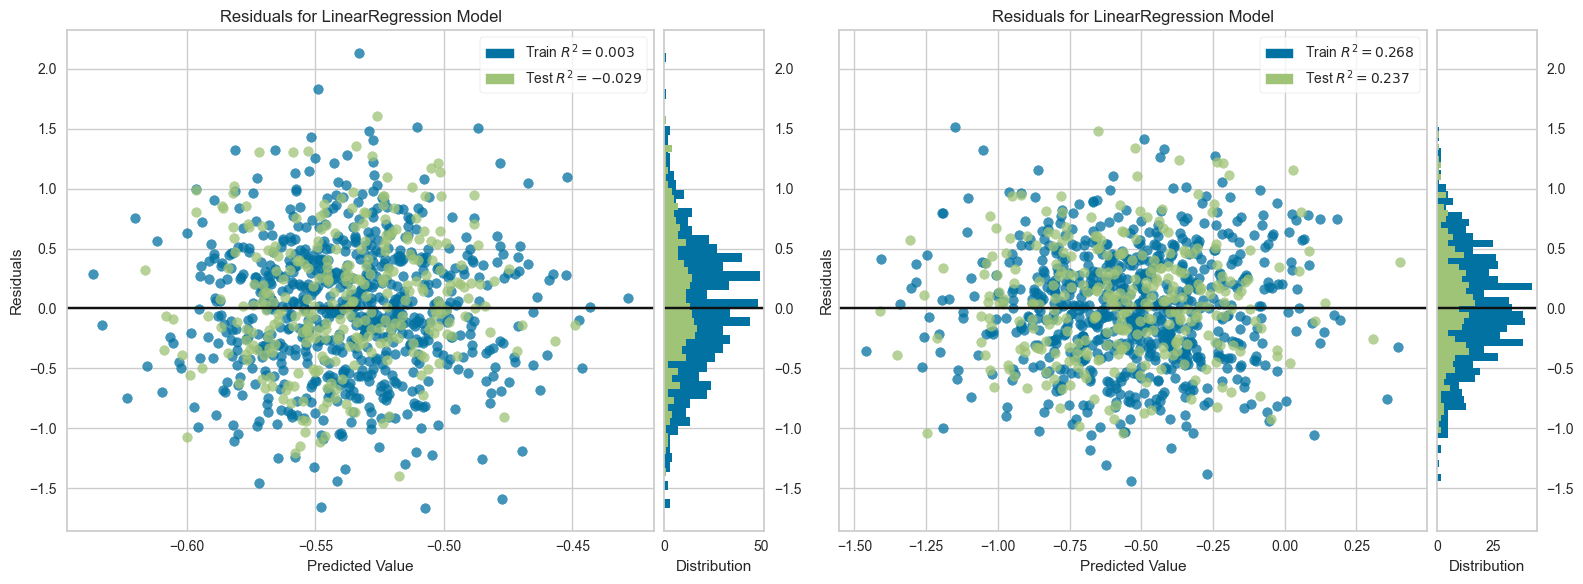

In [20]:
from yellowbrick.regressor import ResidualsPlot

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# График остатков для первой модели
visualizer_x1 = ResidualsPlot(model_x1, ax=ax1)
visualizer_x1.fit(X1_train, y1_train)
visualizer_x1.score(X1_test, y1_test)
visualizer_x1.set_title('Остатки модели: x1')
visualizer_x1.finalize()

# График остатков для второй модели
visualizer_x2 = ResidualsPlot(model_x2, ax=ax2)
visualizer_x2.fit(X2_train, y2_train)
visualizer_x2.score(X2_test, y2_test)
visualizer_x2.set_title('Остатки модели: x2')
visualizer_x2.finalize()

plt.tight_layout()
plt.show()

1.8 Построение графика предсказанных и истинных значений

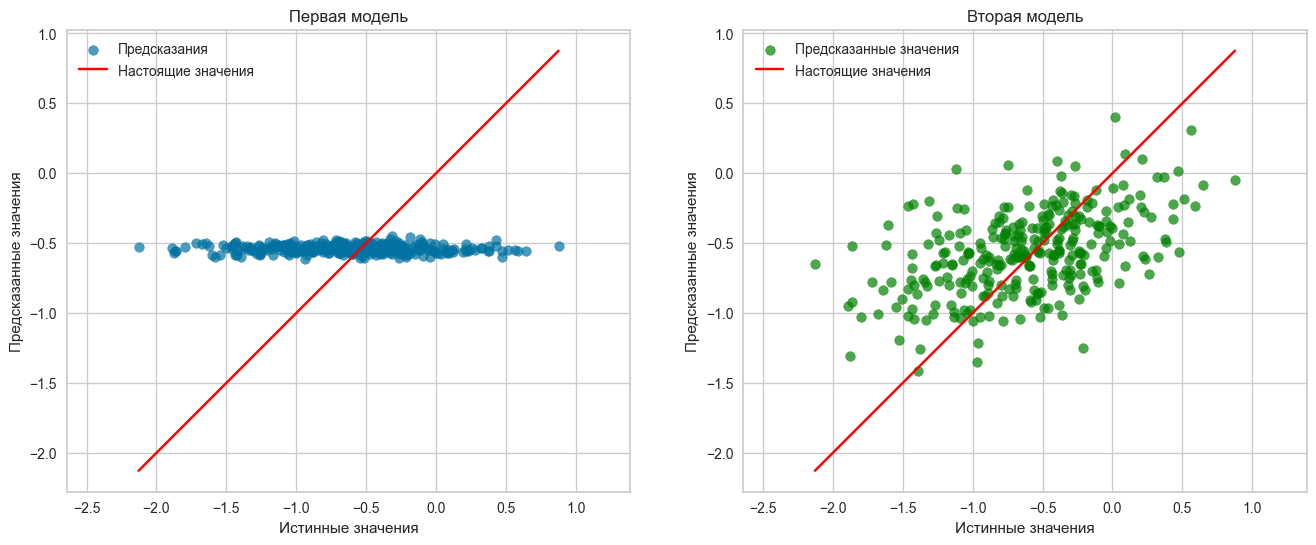

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# График для первой модели
# Нахождение мин/макс для построения идеальной линии
min_val = min(y1_test.min(), y_pred_x1.min())
max_val = max(y1_test.max(), y_pred_x1.max())

ax1.scatter(y1_test, y1_pred_test, label='Предсказания', alpha=0.7)
ax1.plot([min_val, max_val], [min_val, max_val], label='Настоящие значения', color='red')
ax1.set_title('Первая модель')
ax1.set_xlabel('Истинные значения')
ax1.set_ylabel('Предсказанные значения')
ax1.legend()
ax1.axis('equal') 

# График для второй модели
min_val = min(y2_test.min(), y_pred_x2.min())
max_val = max(y2_test.max(), y_pred_x2.max())

ax2.scatter(y2_test, y2_pred_test, color='green', label='Предсказанные значения', alpha=0.7)
ax2.plot([min_val, max_val], [min_val, max_val], label='Настоящие значения', color='red')
ax2.set_title('Вторая модель')
ax2.set_xlabel('Истинные значения')
ax2.set_ylabel('Предсказанные значения')
ax2.legend()
ax2.axis('equal')

plt.show()


#### Выводы по 1 части
- Все метрики ошибок (MSE, MAE, RMSE) у второй модели заметно ниже, чем у первой, это значит что она меньше ошибается, и стоимость ошибки меньше (MAE).
- Коэффициент детерминации у первой модели равен девяти десятитысячным, это очень низкое значение, которое недалеко от того, если просто называть случайные значения.
- У второй же модель коэффициент детерминации в разы выше и равен двадцати шести сотым, это значение тоже не очень высокое, но показывает что есть умеренная связь между x2 и y.
- К таким же выводам можно прийти по графикам. Например в пункте 1.6 видно, что линия регрессии практически горизонтальна и находится примерно на уровне −0.5 на оси y. Это означает, что модель предсказывает почти одно и то же значение y независимо от значения x1. Такая модель не улавливает никакой зависимости в данных, а у второй лииня показывает четкий нисходящий тренд и проходит гораздо ближе к основной массе точек данных.
- На графике остатков модели также заметно, что у второй модели они меньше и облачко точек сосредоточено ближе к нулевой ошибке, чем у первой
- На последнем графике также видно, что  у второй модели значения расположены гораздо ближе к красной линии 


## Часть 2. Полиномиальная регрессия

2.1 Выбор модели для полиномиальной регрессии, реализация модели полиномиальной регрессии

Для полиномиальной регрессии была выбрана вторая модель, так как у нее значительно больший R2, это значит что объясняющая способность в разы лучше у второй модели, тогда как первая несильно отличается от случайного угадывания значений.

Степень полинома была выбрана равной 2

In [ ]:
# Выбор переменной для полиномиальной регрессии
x = df_var4[['x2']]
y = df_var4['y']

# Степень полинома
degree_2 = 2

# Реализация модели
poly_model_d2 = PolynomialFeatures(degree=degree_2)
                              

2.2 - 2.4 Обучение полиномиальной регрессии, выполнение предсказания, подсчет и вывод метрик качества регресии (MAE, R2) 

In [ ]:
# Обучение модели
x_poly = poly_model_d2.fit_transform(x)

y_model = LinearRegression()
y_model.fit(x_poly, y)

# Выполнение предсказания
y_poly_pred_d2 = y_model.predict(x_poly)

# Подсчет метрик (MAE, R2)
mae_d2 = mean_absolute_error(y, y_poly_pred_d2)
r2_d2 = r2_score(y, y_poly_pred_d2)

print(f"Полином степени {degree_2}")
print(f"MAE: {mae_d2:.4f}")
print(f"R2: {r2_d2:.4f}")

Полином степени 2
MAE: 0.3792
R2: 0.2644


2.5 Визуализация регрессии: точки и линия регрессии

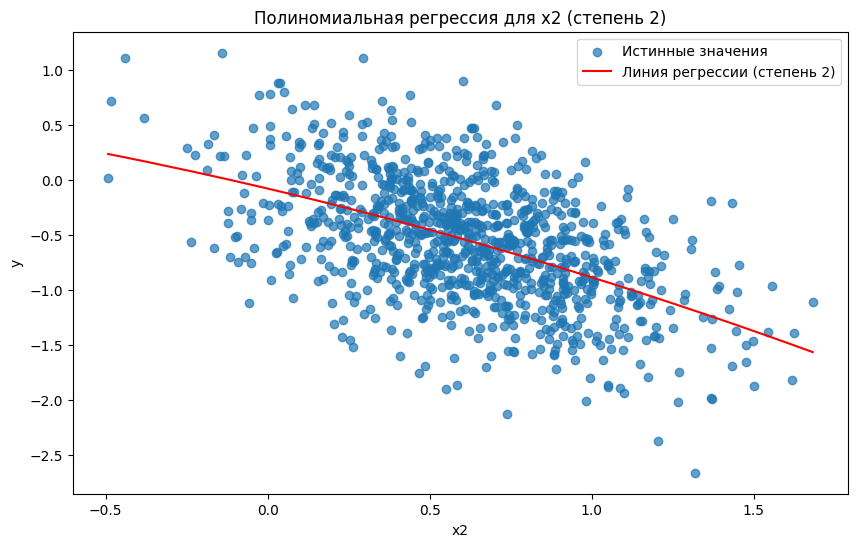

In [ ]:
sort_idx = np.argsort(x.values.flatten()) # Получение индексов для сортировки
x_sorted = x.values.flatten()[sort_idx] # Сортировка x
y_poly_pred_d2_sorted = y_poly_pred_d2[sort_idx] # Сортировка предсказанных y в соответствии с x

plt.figure(figsize=(10, 6)) # Создание фигуры с заданным размером

# Точки исходных данных
plt.scatter(x.values.flatten(), y, label='Истинные значения', alpha=0.7)

# Линия полиномиальной регрессии (используем отсортированные данные)
plt.plot(x_sorted, y_poly_pred_d2_sorted, color='red', label=f'Линия регрессии (степень {degree_2})')

# Заголовок и подписи осей
plt.title(f'Полиномиальная регрессия для x2 (степень {degree_2})')
plt.xlabel('x2')
plt.ylabel('y')
plt.legend() 

2.6 Повторение пунктов 1-5 для другой степени полинома

Была выбрана 5 степень полинома

Полином степени 5
MAE: 0.3780
R2: 0.2673


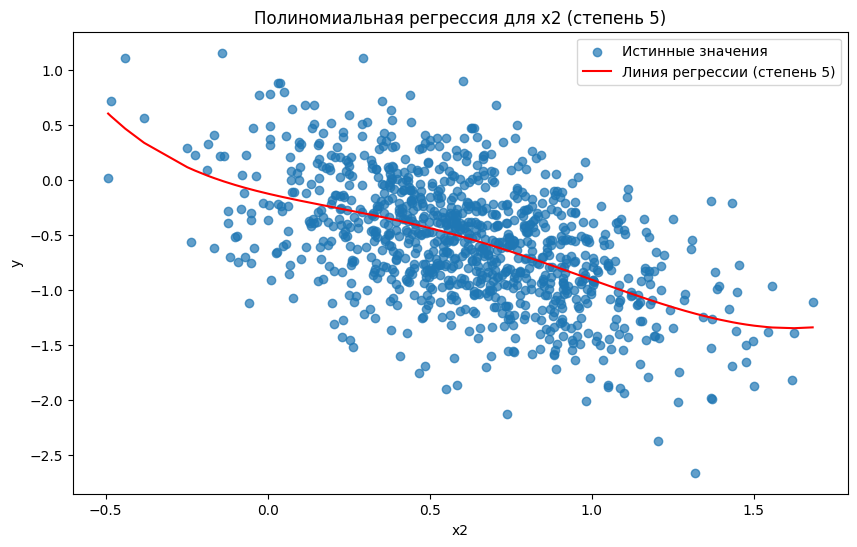

In [ ]:
degree_5 = 5
# Реализация модели
poly_model_d5 = PolynomialFeatures(degree=degree_5)
# Обучение модели
x_poly_v2 = poly_model_d5.fit_transform(x)
y_model_v2 = LinearRegression()
y_model_v2.fit(x_poly_v2, y)
# Выполнение предсказания
y_poly_pred_d5 = y_model_v2.predict(x_poly_v2)
# Подсчет метрик (MAE, R2)
mae_d5 = mean_absolute_error(y, y_poly_pred_d5)
r2_d5 = r2_score(y, y_poly_pred_d5)
print(f"Полином степени {degree_5}")
print(f"MAE: {mae_d5:.4f}")
print(f"R2: {r2_d5:.4f}")
y_poly_pred_d5_sorted = y_poly_pred_d5[sort_idx] # Сортировка предсказанных y в соответствии с x
plt.figure(figsize=(10, 6)) # Создание фигуры с заданным размером
# Точки исходных данных
plt.scatter(x.values.flatten(), y, label='Истинные значения', alpha=0.7)
# Линия полиномиальной регрессии (используем отсортированные данные)
plt.plot(x_sorted, y_poly_pred_d5_sorted, color='red', label=f'Линия регрессии (степень {degree_5})')
# Заголовок и подписи осей
plt.title(f'Полиномиальная регрессия для x2 (степень {degree_5})')
plt.xlabel('x2')
plt.ylabel('y')
plt.legend() 
                              

### Вывод по 2 части
- Для полиоминальной регрессии была выбрана модель 2, так как у нее значительно больший R2, это значит что объясняющая способность в разы лучше у второй модели, тогда как первая несильно отличается от случайного угадывания значений.
- После всех расчетов можно сравнить разные степени полинома и увидеть следующие результаты: линейная - 0.2632, полином степени 2 - 0.2644, полином степени 5 - 0.2673. Видно, что чем выше полином степени, тем и выше будет коэффициент детерминации. Но несмотря на это коэффициент увеличивается на совсем небольшие значения, разница между линейной моделью и моделью с полиномом степени 5 составляет всего лишь 0.041.
- Заметно, что чем больше степень полинома, тем больше график "извивается", так модель подстраивается под конкретный набор данных
- Оптимальная степень полинома - это та, которая хорошо описывает общий тренд в данных, но не подстраивается под случайный шум. Оптимальной считается та степень, которая дает наилучшие метрики на тестовой (невиданной ранее) выборке.
- Если степень полинома слишком низкая, то может возникнуть такая проблема, как недообучение, такая модель может быть слишком простой и не способна уловить закономерность.
- Если степень полинома слишком высокая, то может возникнуть такая проблема, как переобучение, модель будет становится слишком сложной. Она почти идеально будет проходить через все точки обучающей выборки, подстраиваясь под малейший шум. R2 на обучающих данных будет очень высоким. Однако такая модель будет давать плохие результаты на новых данных, так как она выучила шум, а не закономерность. Ее линия на графике будет сильно извиваться.



## Часть 3 Решение задачи регрессии различными методами

3.1 Загрузка набора данных salary.csv, просмотр данных и информации о датасете через info()

In [ ]:
df_salary = pd.read_csv('salary.csv')
display(df_salary.head())
display(df_salary.info())

,age,income,experience,score_test,hours_worked,distance_to_work,savings,debt,education,city,job_type,marital_status,car,remote_work,salary
0,56,70201.189680,25,87.559729,62,3.708690,25987.334048,2556.821627,PhD,Chicago,Finance,Single,Yes,Yes,106233.833479
1,69,51901.897395,39,70.808381,36,7.082793,22134.899021,725.180513,High School,Houston,Retail,Single,No,Yes,87205.291042
2,46,38605.409293,4,63.324996,77,5.129154,47106.068408,12659.359583,PhD,Los Angeles,Finance,Married,Yes,No,69369.283522
3,32,49949.736955,20,78.215505,33,19.315623,15868.328813,12369.776003,Bachelor,Los Angeles,IT,Married,Yes,No,76587.116955
4,60,48965.290095,13,74.429096,48,5.654904,15734.633332,4792.095213,Bachelor,Phoenix,IT,Married,No,No,71023.148842


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1500 non-null   int64  
 1   income            1500 non-null   float64
 2   experience        1500 non-null   int64  
 3   score_test        1500 non-null   float64
 4   hours_worked      1500 non-null   int64  
 5   distance_to_work  1500 non-null   float64
 6   savings           1500 non-null   float64
 7   debt              1500 non-null   float64
 8   education         1500 non-null   object 
 9   city              1500 non-null   object 
 10  job_type          1500 non-null   object 
 11  marital_status    1500 non-null   object 
 12  car               1500 non-null   object 
 13  remote_work       1500 non-null   object 
 14  salary            1500 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 175.9+ KB


None

2.2 Выделение целевой переменной, построение boxplot и гистограммы для целевой переменной

Целевая переменная это salary, потому что по всем данным что имеются в таблице будет логичнее всего искать ее

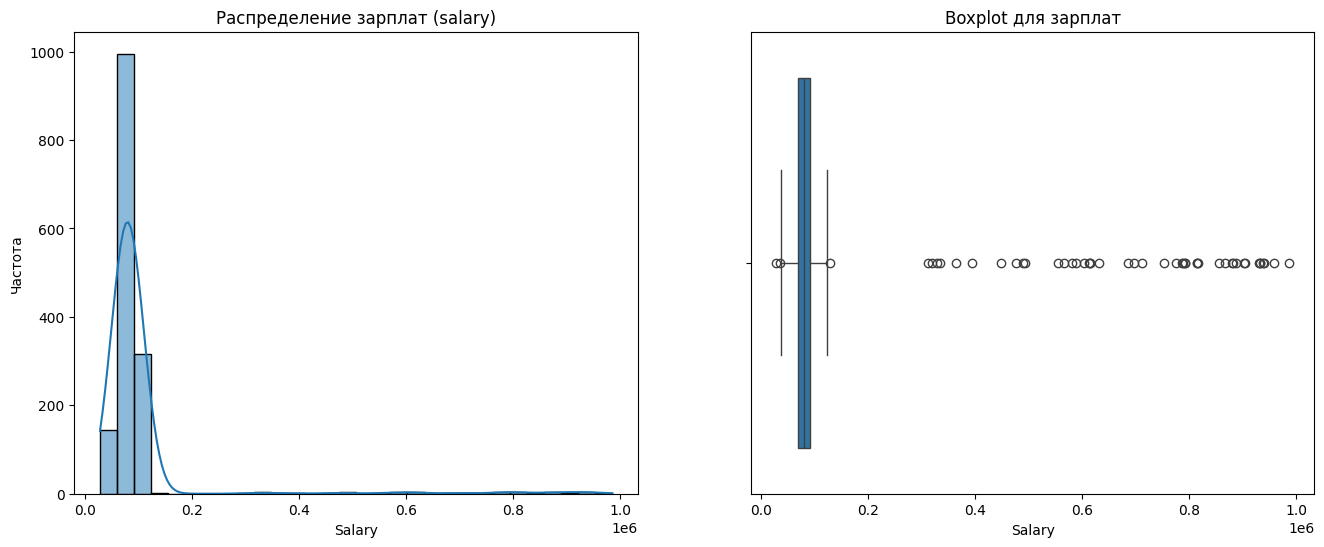

In [ ]:
# Целевая переменная (y)
y = df_salary['salary']

# Визуализация целевой переменной
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Гистограмма
sns.histplot(y, kde=True, ax=ax1, bins=30)
ax1.set_title('Распределение зарплат (salary)')
ax1.set_xlabel('Salary')
ax1.set_ylabel('Частота')

# Boxplot
sns.boxplot(x=y, ax=ax2)
ax2.set_title('Boxplot для зарплат')
ax2.set_xlabel('Salary')

plt.show()

3.3 Обработка выбросов, визуализация после обработки

По гистограмме и boxplot предыдущего задания видно, что выбросы сильно изменяют общую картину распределения, поэтому было принято решение обработать выбросы методом межквартильного размаха

Было строк: 1500
Осталось строк после очистки выбросов: 1452
Удалено строк: 48


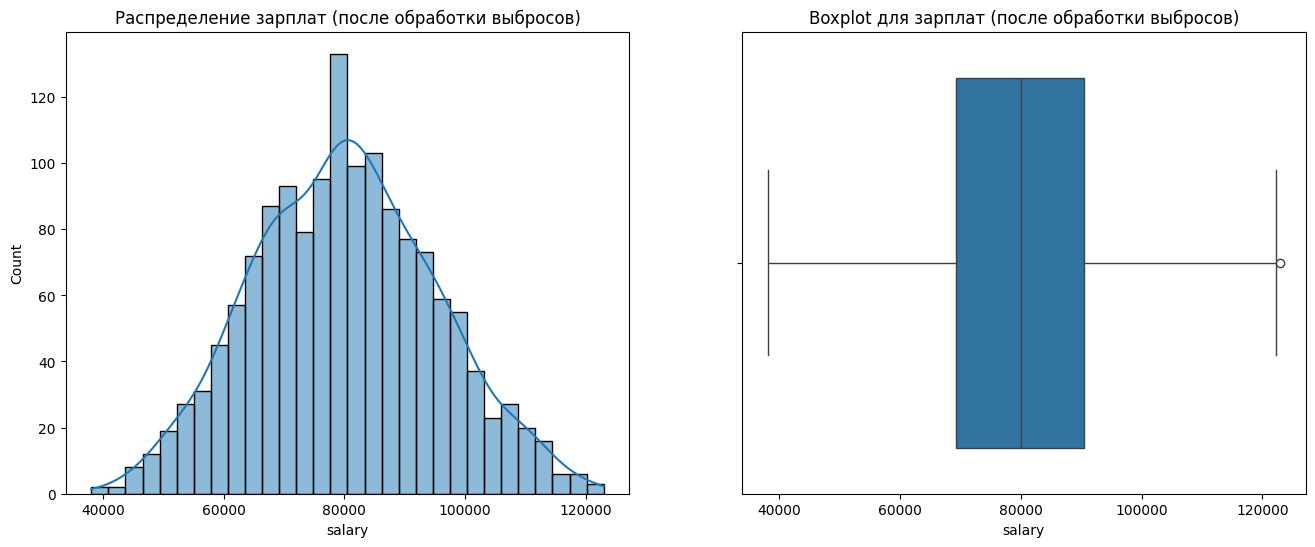

In [ ]:
# Удаление выбросов методом межквартильного размаха
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация исходного DataFrame
original_rows = df_salary.shape[0]
df_clean = df_salary[(df_salary['salary'] >= lower_bound) & (df_salary['salary'] <= upper_bound)]
cleaned_rows = df_clean.shape[0]

print(f"Было строк: {original_rows}")
print(f"Осталось строк после очистки выбросов: {cleaned_rows}")
print(f"Удалено строк: {original_rows - cleaned_rows}")

# Визуализация после обработки
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(df_clean['salary'], kde=True, ax=ax1, bins=30)
ax1.set_title('Распределение зарплат (после обработки выбросов)')
sns.boxplot(x=df_clean['salary'], ax=ax2)
ax2.set_title('Boxplot для зарплат (после обработки выбросов)')
plt.show()

3.4 Построение матрицы диаграммы рассеяния

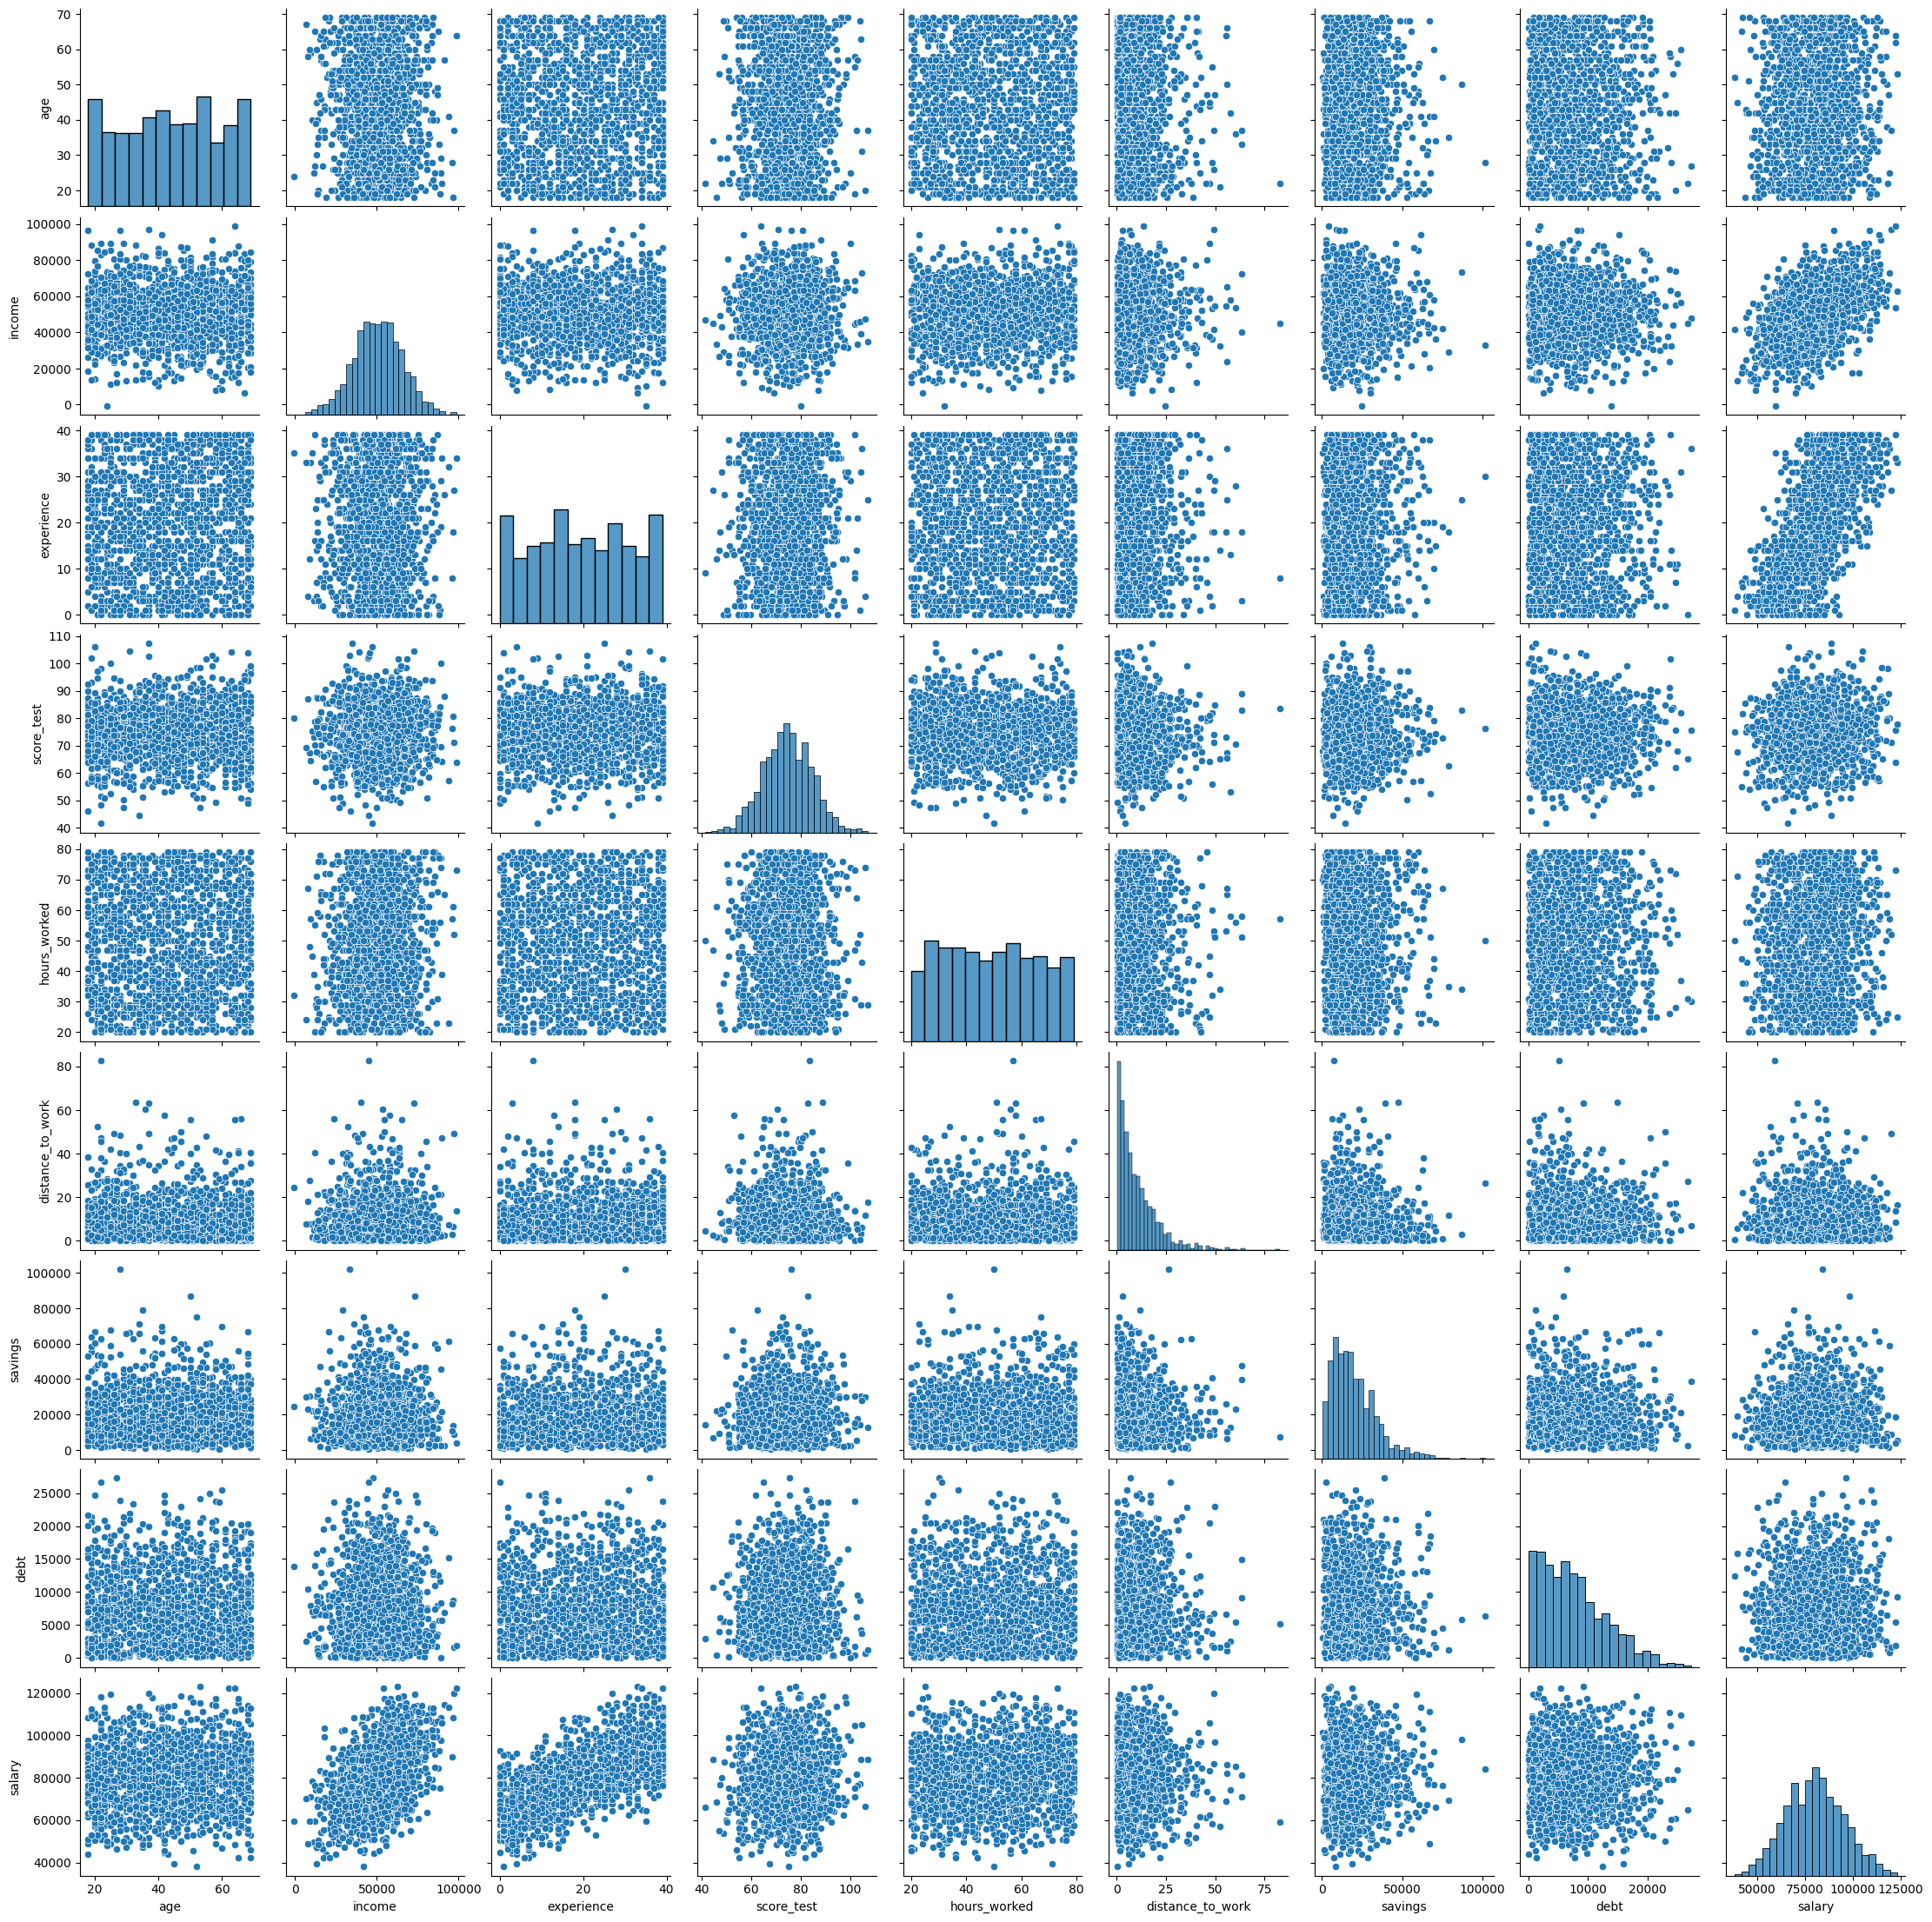

In [ ]:
numerical_features = ['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt', 'salary']

sns.pairplot(df_clean[numerical_features])
plt.show()

3.5 Разделение данных на обучающую и валидационные выборки

In [ ]:
# Обновляем X и y после очистки
y = df_clean['salary']
X = df_clean.drop('salary', axis=1)

# Разделение данных: 80% на обучение, 20% на тест
# random_state=42 - для воспроизводимости результата
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Размер обучающей выборки (X_train): {X_train.shape}")
print(f"Размер тестовой выборки (X_test):   {X_test.shape}")
print(f"Размер обучающей выборки (y_train): {y_train.shape}")
print(f"Размер тестовой выборки (y_test):   {y_test.shape}")

Размер обучающей выборки (X_train): (1161, 14)
Размер тестовой выборки (X_test):   (291, 14)
Размер обучающей выборки (y_train): (1161,)
Размер тестовой выборки (y_test):   (291,)


3.6 Нормализация данных

In [ ]:
numeric_features = ['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt']
categorical_features = df_salary.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, drop_first=True) 
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)
scaler = StandardScaler()
# Применение нормализации к числовым столбцам X_train
# fit_transform() вычисляет среднее значение (mean) и стандартное отклонение (std) а затем масштабирует их.
X_train_encoded[numeric_features] = scaler.fit_transform(X_train_encoded[numeric_features])
# Применение нормализации к числовым столбцам X_test
X_test_encoded[numeric_features] = scaler.transform(X_test_encoded[numeric_features])

# Замена числовых столбцов нормализованными значениями
X_train_processed = X_train_encoded
X_test_processed = X_test_encoded


3.7 Обучение модели через LinearRegression

In [ ]:
# Создание и обучение модели на обработанных данных
model_lr = LinearRegression()
model_lr.fit(X_train_processed, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


3.8 Применение обученной модели на тестовой выборке и оценка качества с помощью метрик

In [ ]:
# Предсказание на обработанных тестовых данных
y_pred_lr = model_lr.predict(X_test_processed)

# Подсчет метрик (использование функции из Части 1)
get_regression_metrics(y_test, y_pred_lr, "Линейная регрессия")

Linear Regression (Test)
MSE: 36935814.3941
MAE: 4864.2801
RMSE: 6077.4842
R2: 0.8663


3.9 Создание и вывод датафрема с истинными и предсказанными значениями

In [ ]:
df_results_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})

display(df_results_lr.head(10))

,Actual,Predicted
1070,90772.277599,90117.106702
1161,84475.346122,88639.505404
1031,67777.676332,63882.119299
1360,110650.659849,106502.062033
552,68551.168300,67807.228647
637,79324.467916,70714.840623
916,59571.086625,53864.146222
50,90409.785269,85511.182937
1162,92280.580124,94850.451519
514,79311.102051,80720.941888


3.10 Создание датафрейма с с признаками и значением коэффициентов для каждого признака

In [ ]:
# Создаем DataFrame для коэффициентов
df_coeffs = pd.DataFrame({
    'Feature': model_lr.feature_names_in_,
    'Coefficient': model_lr.coef_
})

# Сортировка по абсолютному значению коэффициента (по силе влияния)
df_coeffs['Abs_Coefficient'] = df_coeffs['Coefficient'].abs()
df_coeffs_sorted = df_coeffs.sort_values(by='Abs_Coefficient', ascending=False)
print("Влияние признаков на целевую переменную (топ-15):")
display(df_coeffs_sorted.drop('Abs_Coefficient', axis=1))

Влияние признаков на целевую переменную (топ-15):


,Feature,Coefficient
10,education_PhD,12699.221635
2,experience,10296.744782
1,income,7355.197193
9,education_Master,6612.583313
8,education_High School,-6033.649289
17,job_type_IT,4109.192167
15,job_type_Finance,2484.270661
13,city_New York,1426.901299
3,score_test,1170.790753
21,car_Yes,-1095.468114


### Общие выводы:
1.  Образование и опыт - ключевые факторы: самые сильные положительные коэффициенты связаны с уровнем образования (PhD, Master) и опытом работы (experience). Это наиболее значимые драйверы роста зарплаты.
2.  Годовой доход до текущей работы также имеет очень высокий положительный коэффициент. Это логично, так как люди у которых была высокая зарплата на прошлом месте работы скорее всего не будут работать за меньшие деньги.
3.  Негативное влияние низкого образования очень заметно, наличие только среднего образования показывает себя как сильный негативный фактор.
4. Финансовые показатели: наличие долга у человека имеет небольшой отрицательный эффект, это может быть связано с тем, что люди, у которых итак низкая зарплата чаще берут кредиты. А сбережения у человека почти никак не влияют на рост зарплаты.
5. Больше всех получают работники в It сфере и в сфере финансов, а меньше всех получают в ритейле.
6. Увеличение количества рабочих часов совсем незначительно увеличивает заработную плату
7. Довольно сильную положительную связь к зарплате дает проживание в больших городах: Нью-Йорк и Лос Анджелес, а работники из Феникса и Хьюстона получают меньше, это логично, так как в больших городах и жилье стоит намного дороже, следовательно и зарплаты будут выше.
8. Хорошие результаты прохождения профессионального теста являются довольно сильным показателем увеличения зарплаты, так как работник более квалифицирован.
9. Удивительным выглядит фактор наличия автомобиля, так как его наличие является существенным отрицательным фактором


3.11 Визуализация фактических и предсказанных значений

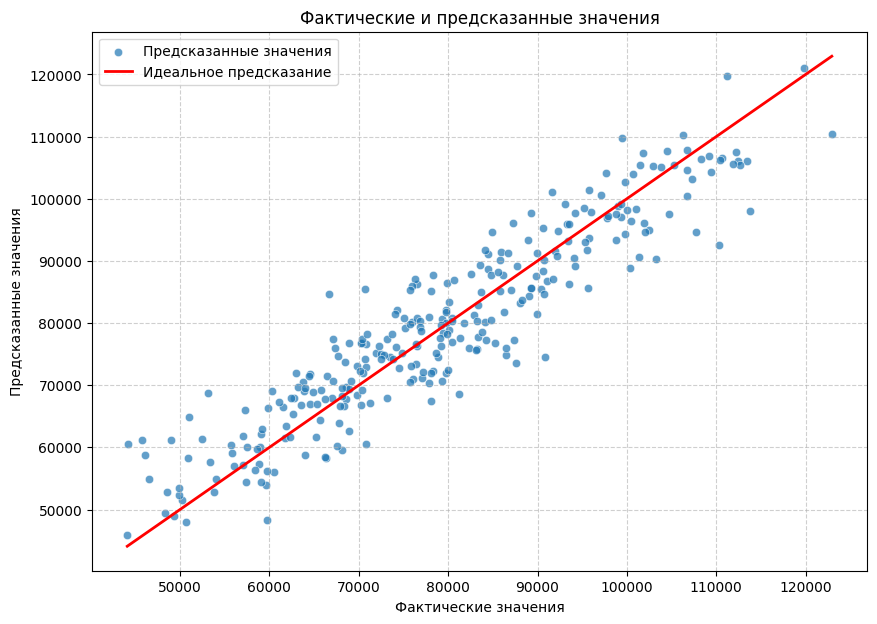

In [ ]:
plt.figure(figsize=(10, 7)) 

# Точки, представляющие фактические и предсказанные значения
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.7, label='Предсказанные значения') 

# Линия идеального предсказания
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Идеальное предсказание')

plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические и предсказанные значения")

# Добавление легенды
plt.legend()

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

3.12 Регрессия методом k-ближайших соседей

In [ ]:
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train_processed, y_train)

# Предсказание на тестовых данных
y_pred_knn = model_knn.predict(X_test_processed)

# Подсчет метрик для регрессии k-ближайших соседей
get_regression_metrics(y_test, y_pred_knn, "Регрессия k-ближайших соседей")

Регрессия k-ближайших соседей
MSE: 121737061.5965
MAE: 9026.5547
RMSE: 11033.4519
R2: 0.5595


3.13 Визуализация и сравнение фактического и предсказанного значений, сравнение результатов полученых всеми методами

,Actual,Predicted,Predicted_k_method
1070,90772.277599,90117.106702,93088.662566
1161,84475.346122,88639.505404,77864.949040
1031,67777.676332,63882.119299,66207.287607
1360,110650.659849,106502.062033,86750.211491
552,68551.168300,67807.228647,69626.394846
637,79324.467916,70714.840623,73939.039645
916,59571.086625,53864.146222,70246.737211
50,90409.785269,85511.182937,85951.681297
1162,92280.580124,94850.451519,104989.162110
514,79311.102051,80720.941888,81072.065074


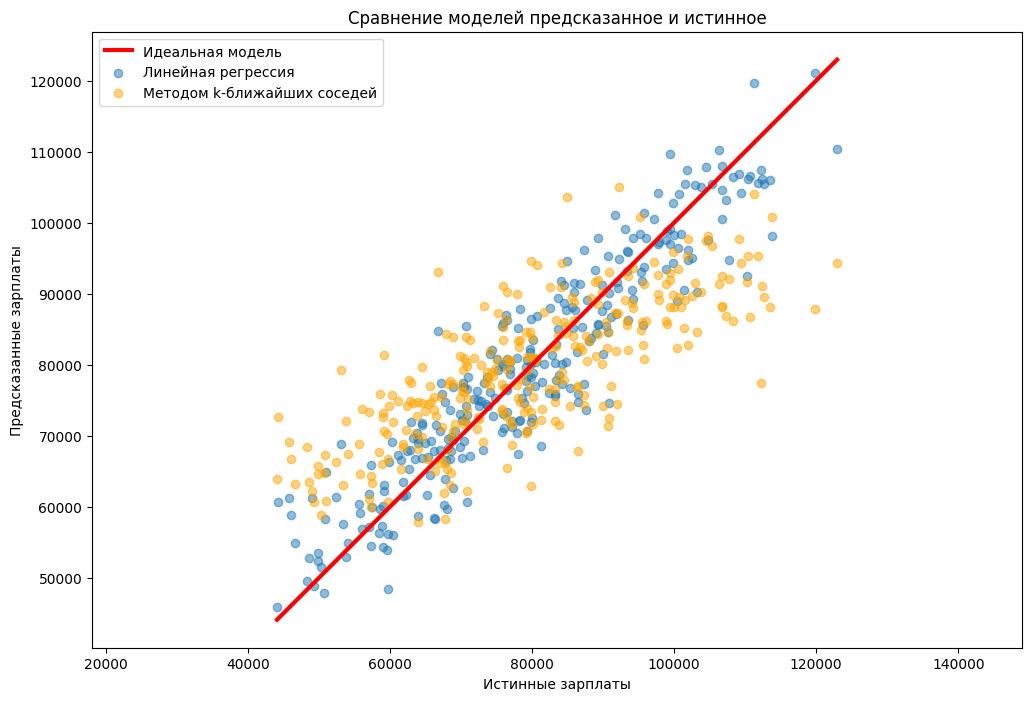

In [ ]:
# Добавление предсказания KNN в DataFrame
df_results_lr['Predicted_k_method'] = y_pred_knn

display(df_results_lr.head(10))

plt.figure(figsize=(12, 8))

# Нахождение общих мин/макс
min_val = min(y_test.min(), y_pred_lr.min(), y_pred_knn.min())
max_val = max(y_test.max(), y_pred_lr.max(), y_pred_knn.max())

# Идеальная линия
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=3, label='Идеальная модель')

# Точки для Линейной регрессии
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Линейная регрессия')
# Точки для метода k-ближайших соседей
plt.scatter(y_test, y_pred_knn, alpha=0.5, label='Методом k-ближайших соседей', color='orange')

plt.title('Сравнение моделей предсказанное и истинное')
plt.xlabel('Истинные зарплаты')
plt.ylabel('Предсказанные зарплаты')
plt.legend()
plt.axis('equal')
plt.show()

### Выводы Части 3
- По всем метрикам и визуально по графику можно сделать вывод, что целесообразнее использовать линейную регрессию. Так как в линейной MSE равно 36_935_814, а в регрессии k-ближайших соседей MSE равно 121_737_061, такая же ситуация с MAE: 4864 против 9026 и коэффициента детерминации: 0.8663 против 0.5595. По графику из предыдущего пункта видно, что синие точки (линейная регресссия) расположены к прямой идеальных предсказаний ближе, чем желтые (регрессия методом k-ближайших соседей)
- Возможно на большем объеме данных методом k-ближайших соседей показал бы себя лучше, так как были бы более понятны ближайшие соседи, возможно сейчас их недостаточно для того чтобы выявить некоторых, свидетельсвтом этого может быть то, что в некоторых сравнениях метод k-ближайших соседей показал себя даже лучше линейной регрессии, либо это говорит о том, что зависимость между признаками и целевой переменной, скорее всего, носит линейный или близкий к линейному характер, и метод, основанный на близости соседей (kNN), менее эффективен для ее улавливания, чем глобальный линейный подход.


## Общие выводы
- В первой части лабораторной работы были исследованы признаки x1 и x2 и их влияние на переменную y. Была построена модель простой линейной регрессии, посчитаны ключевые метрики для сравнения двух моделей: MSE, MAE, RMSE, R2. Проведено сравнение двух моделей, по этому сравнению можно сделать вывод, что вторая модель намного лучше справляется со своей задачей, так как у первой большие ошибки и R2 равный всего 0.0009, в то время как у второй пусть и не очень высокий показатель равный 0.2632, но он показывает умеренную линейную связь с y
- Во второй части была изучена полиномиальная регрессия, для нее была выбрана одна из двух переменных, а именно x2, потому что брать x1 не было смысла, эффективность у нее очень маленькая и полиноминальная регрессия бы ее сильно не улучшила. Были посчитаны ключевые метрики и построены графики для двух степеней полинома: 2 и 5, анализ показал, что все показатели стали чуть лучше со степенью полинома равной 5, но эти различия были совсем небольшими, для R2 например разница была в 4 сотых
- В третьей части работы был исследован датасет salary.csv, который состоит из записей про людей с различными признаками и их зарплатой, задача была выбрать целевую переменную (зарплату) и предсказать ее. Были обработаны выбросы, которые мешали детально оценить данные, построены различные диаграммы, в том числе и матрица диаграмм рассеяния для числовых признаков датасета. Данные были разделены на обучующую и валидационную выборки, данные были нормализованы и закодированы, была построена и обучена линейная регриссионная модель для этих данных, эта модель была проверена на тестовой выборке и для нее были посчитаны 4 основные метрики, по которым эта модель показала очень хороший результат. Был создан датафрейм с признаками и значением коэффициентов для каждого признака, по этим признакам были сделаны различные выводы. Далее была построена регрессионная модель методом k-ближайших соседей, для этой модели аналогично были посчитаны все метрики, а сама она была визуалищирована всместе с первой моделью, было проведено сравнение, результатом которого стал выбор более целесообразного метода, а именн ометода регрессионного анализа, он показал себя заметно лучше во всех показателях

### Дополнительное задание 6
Осуществить подбор оптимальных параметров с помощью
GridSearchCV для kNN. Сравнить качество модели для подобранных параметров и любых других.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Определение сетки параметров для kNN
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}

# Инициализация модели и GridSearchCV
knn = KNeighborsRegressor()
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='neg_mean_squared_error', # Используем MSE для поиска лучшей модели
    cv=5,                             # 5-кратная кросс-валидация
    n_jobs=-1                         # Использовать все ядра процессора
)

# Обучение GridSearchCV
grid_search.fit(X_train_processed, y_train)

# Получение лучших параметров и модели
best_params_knn = grid_search.best_params_
best_score_knn = -grid_search.best_score_ # Преобразуем отрицательный MSE обратно в положительный
print(f"Лучшие параметры для kNN: {best_params_knn}")
print(f"Лучший MSE на кросс-валидации: {best_score_knn:.4f}")

best_knn_model = grid_search.best_estimator_

# 1. Модель с оптимальными параметрами (найденными через GridSearchCV)
best_knn_pred = best_knn_model.predict(X_test_processed)
r2_best = r2_score(y_test, best_knn_pred)
mse_best = mean_squared_error(y_test, best_knn_pred)
rmse_best = np.sqrt(mse_best)

# 2. Метрики для БАЗОВОЙ модели (k=5)
r2_k5 = r2_score(y_test, y_pred_knn)
mse_k5 = mean_squared_error(y_test, y_pred_knn)
rmse_k5 = np.sqrt(mse_k5)

# 3. Вывод и сравнение
print("\nСравнение качества kNN моделей на тестовой выборке:")
print("-" * 55)
print(f"Модель: Оптимальная ({best_params_knn}), R2-score: {r2_best:4f}, MSE: {mse_best:4f}, RMSE: {rmse_best:4f}")
print("-" * 55)
print(f"Модель: Базовая (k=5), R2-score: {r2_k5:4f}, MSE: {mse_k5:4f}, RMSE: {rmse_k5:4f}")


Лучшие параметры для kNN: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
Лучший MSE на кросс-валидации: 85540406.4878

Сравнение качества kNN моделей на тестовой выборке:
-------------------------------------------------------
Модель: Оптимальная ({'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}), R2-score: 0.584495, MSE: 114819981.460140, RMSE: 10715.408600
-------------------------------------------------------
Модель: Базовая (k=5), R2-score: 0.559463, MSE: 121737061.596508, RMSE: 11033.451935


В этом разделе проводился подбор оптимальных гиперпараметров для модели **k-ближайших соседей (kNN)**, что является ключевым этапом для улучшения ее предсказательной способности.

### Принцип работы Grid Search (GridSearchCV)

Для систематического поиска наилучших параметров использовался метод **перебора по сетке** (`GridSearchCV`):

1.  **Определение сетки параметров:** Сначала была задана сетка (словарь) гиперпараметров, которые подлежат оптимизации. В данном случае это:
    * `n_neighbors`: Количество ближайших соседей (обычно варьируется в диапазоне от 1 до 20).
    * `metric`: Метрика расстояния, используемая для определения "близости" (например, Евклидово, Манхэттенское).
    * `weights`: Метод взвешивания соседей (равномерные веса или веса, обратно пропорциональные расстоянию).
2.  **Кросс-валидация:** `GridSearchCV` автоматически обучает и тестирует модель для каждой возможной комбинации параметров, используя **кросс-валидацию** (в данном случае 5-кратную). Это гарантирует, что оценка качества не зависит от конкретного разбиения обучающей выборки.
3.  **Оценка качества:** Каждая модель оценивается по заданной метрике (`neg_mean_squared_error`), и алгоритм выбирает ту комбинацию параметров, которая показала **наилучший средний результат** на всех фолдах кросс-валидации.
4.  **Сравнение:** Модель, обученная на **оптимальных параметрах**, затем сравнивается с **базовой моделью** (с заданным вручную параметром $k=5$). Сравнение по метрикам ($R^2$, MSE, RMSE) на тестовой выборке численно подтверждает эффективность подбора параметров: R^2 у оптимальной модели 0.58, а у базовой 0.55, MSE 114819981.460140 и 121737061.596508 соответственно, также 10715.408600 у оптимальной и 11033.451935 у базовой. Во всех параметрах видны преимущества оптимальной модели


### Дополнительное задание 11
Написать функцию
model_train_test(X_train, y_train, X_test, y_test, model)
, которая будет выполнять обучение и тестирование модели на обучающей и тестовой выборке. В model - указывается название модели. Функция должна выводить минимум 3 метрики и таблицу с предсказанными, истинными значениями и разницей между ними.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def model_train_test(X_train, y_train, X_test, y_test, model):
    # 1. Обучение модели
    model_name = type(model).__name__
    print(f"--- Обучение и тестирование модели: {model_name} ---")
    model.fit(X_train, y_train)

    # 2. Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # 3. Расчет метрик
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("\nМетрики качества модели:")
    print(f"R2: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")

    # 4. Создание сравнительной таблицы
    results_df = pd.DataFrame({
        'Истинное_значение': y_test,
        'Предсказанное_значение': y_pred.round(2),
        'Разница (Истина - Предсказание)': (y_test - y_pred).round(2)
    })

    print("\nСравнительная таблица (Первые 10 значений):")
    return results_df.head(10)


# Использование для Линейной регрессии
lr_model = LinearRegression()
lr_results = model_train_test(X_train_processed, y_train, X_test_processed, y_test, lr_model)
display(lr_results)


--- Обучение и тестирование модели: LinearRegression ---

Метрики качества модели:
R-squared (R2): 0.8663
Mean Absolute Error (MAE): 4864.28
Mean Squared Error (MSE): 36935814.39
Root Mean Squared Error (RMSE): 6077.48

Сравнительная таблица (Первые 10 значений):


,Истинное_значение,Предсказанное_значение,Разница (Истина - Предсказание)
1070,90772.277599,90117.11,655.17
1161,84475.346122,88639.51,-4164.16
1031,67777.676332,63882.12,3895.56
1360,110650.659849,106502.06,4148.60
552,68551.168300,67807.23,743.94
637,79324.467916,70714.84,8609.63
916,59571.086625,53864.15,5706.94
50,90409.785269,85511.18,4898.60
1162,92280.580124,94850.45,-2569.87
514,79311.102051,80720.94,-1409.84




Для стандартизации процесса тестирования и сравнения различных регрессионных моделей была разработана универсальная функция `model_train_test`.

### Описание функции `model_train_test`

Эта функция принимает на вход тренировочные и тестовые данные (`X_train`, `y_train`, `X_test`, `y_test`), а также **любой инициализированный объект модели** (например, `LinearRegression()` или `KNeighborsRegressor()`).

Функция выполняет следующие ключевые шаги:

1.  **Обучение модели:** Используя метод `.fit()`, функция обучает переданную модель на тренировочных данных.
2.  **Предсказание:** С помощью метода `.predict()`, модель генерирует предсказанные значения (`y_pred`) на тестовой выборке.
3.  **Расчет и вывод метрик:** Вычисляются и выводятся основные **метрики качества регрессии**:
    * **$R^2$-score** (коэффициент детерминации): Показывает, какая доля дисперсии целевой переменной объясняется моделью. Чем ближе к 1, тем лучше.
    * **MAE**: Среднее абсолютное отклонение, показывает среднюю величину ошибки предсказания в единицах целевой переменной.
    * **MSE**: Среднеквадратическая ошибка. Сильно штрафует большие ошибки.
    * **RMSE**: Корень из MSE. Используется для интерпретации ошибки в исходных единицах измерения.
4.  **Создание сравнительной таблицы:** Формируется и выводится таблица (DataFrame), содержащая **истинные значения** (`y_test`), **предсказанные значения** (`y_pred`) и **разницу** между ними. Эта таблица позволяет провести детальный анализ ошибок модели на конкретных примерах.

Таким образом, функция `model_train_test` обеспечивает быстрый, унифицированный и полный отчет о производительности любой регрессионной модели.